<a href="https://colab.research.google.com/github/sathamhussain7/task-7/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.shape

(400, 5)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.Gender=df.Gender.map({'Male':0,'Female':1})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 7)

**Feature Scaling**

In [ ]:
# from sklearn.preprocessing import StandardScaler ## standrard scaling 
# scaler = StandardScaler() #initialise to a variable
# scaler.fit(X_train) # we are finding the values of mean and sd from the td
# X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
# X_test_scaled = scaler.transform(X_test) # transform the test data 

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy', random_state=7)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

**Predicting the Test set results**

In [ ]:
y_pred=dt.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[59,  9],
       [11, 21]])

In [ ]:
dt.score(X_test_scaled, y_test)

0.8

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
y_pred = dt.predict(X_test_scaled) 
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))


Test set accuracy: 0.80
Test set auc: 0.76


In [ ]:
from sklearn.model_selection import cross_val_score 

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_train_scaled, y_train) 
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train_scaled)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8333333333333334  Cross val score :  0.8266666666666668
Depth  :  2  Training Accuracy :  0.9166666666666666  Cross val score :  0.9133333333333334
Depth  :  3  Training Accuracy :  0.9166666666666666  Cross val score :  0.9066666666666666
Depth  :  4  Training Accuracy :  0.9366666666666666  Cross val score :  0.8800000000000001
Depth  :  5  Training Accuracy :  0.9433333333333334  Cross val score :  0.8733333333333334
Depth  :  6  Training Accuracy :  0.97  Cross val score :  0.8666666666666668
Depth  :  7  Training Accuracy :  0.9733333333333334  Cross val score :  0.8566666666666667
Depth  :  8  Training Accuracy :  0.99  Cross val score :  0.85
Depth  :  9  Training Accuracy :  0.9933333333333333  Cross val score :  0.85
Depth  :  10  Training Accuracy :  0.9966666666666667  Cross val score :  0.8533333333333333
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.8533333333333333


**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 42.5\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(0.25, 0.5, 'X[2] <= 91500.0\ngini = 0.283\nsamples = 211\nvalue = [175, 36]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.056\nsamples = 174\nvalue = [169, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [6, 31]'),
 Text(0.75, 0.5, 'X[1] <= 51.5\ngini = 0.265\nsamples = 89\nvalue = [14, 75]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [12, 40]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.102\nsamples = 37\nvalue = [2, 35]')]

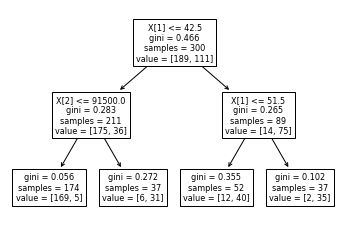

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train_scaled, y_train)
from sklearn import tree
tree.plot_tree(dt) 

**Visualising the Test set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 44.0\ngini = 0.435\nsamples = 100\nvalue = [68, 32]'),
 Text(0.25, 0.5, 'X[2] <= 89500.0\ngini = 0.248\nsamples = 76\nvalue = [65, 11]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.087\nsamples = 66\nvalue = [63, 3]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.75, 0.5, 'X[2] <= 62500.0\ngini = 0.219\nsamples = 24\nvalue = [3, 21]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 12\nvalue = [3, 9]')]

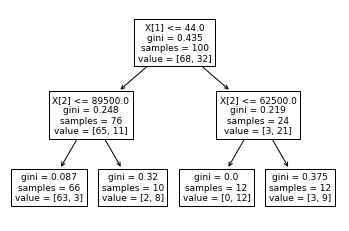

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_test_scaled, y_test)
from sklearn import tree
tree.plot_tree(dt) 